# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [68]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
load_dotenv()

%matplotlib inline

In [69]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [70]:
# Create a newsapi client
news_api = NewsApiClient(api_key=api_key)

In [71]:
# Fetch the Bitcoin news articles
bitcoin_news = news_api.get_everything(
    q="Bitcoin", language="en", sort_by="relevancy"
)
print(f"Total Bitcoin News Articles: {bitcoin_news['totalResults']}")
bitcoin_news["articles"][0]

Total Bitcoin News Articles: 4568


{'source': {'id': None, 'name': 'Lifehacker.com'},
 'author': 'Mike Winters on Two Cents, shared by Mike Winters to Lifehacker',
 'title': 'Is the New Visa Bitcoin Rewards Card Worth It?',
 'description': 'Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless you’re extremely bullish on cryptocurrency and don’t mind getting seriously dinged fo…',
 'url': 'https://twocents.lifehacker.com/is-the-new-visa-bitcoin-rewards-card-worth-it-1845803159',
 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/a2650t4nr8r2uyujbnfu.png',
 'publishedAt': '2020-12-03T22:00:00Z',
 'content': 'Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars]'}

In [72]:
# Fetch the Ethereum news articles
eth_news = news_api.get_everything(q="Ethereum", language="en", sort_by="relevancy")
print(f"Total Ethereum News Articles: {eth_news['totalResults']}")
eth_news["articles"][0]

Total Ethereum News Articles: 1231


{'source': {'id': 'reuters', 'name': 'Reuters'},
 'author': 'Tom Wilson',
 'title': 'Smaller digital coins soar as bitcoin powers on towards record high - Reuters UK',
 'description': 'Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.',
 'url': 'https://in.reuters.com/article/us-crypto-currencies-idUKKBN2831RI',
 'urlToImage': 'https://static.reuters.com/resources/r/?m=02&d=20201123&t=2&i=1542157677&r=LYNXMPEGAM0XD&w=800',
 'publishedAt': '2020-11-23T14:16:00Z',
 'content': 'FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]'}

In [84]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,text,compound,positive,negative,neutral
0,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838
1,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950
2,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,0.000,1.000
3,If youve been watching the crypto markets over...,0.4404,0.152,0.075,0.773
4,Six years after the launch of the Mexico-based...,0.0000,0.000,0.000,1.000


In [86]:
# Create the ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,text,compound,positive,negative,neutral
0,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
1,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
2,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912
3,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.0,0.948
4,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.0,0.948


In [87]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.194484,0.050737,0.003947,0.945316
std,0.266427,0.069277,0.017206,0.077066
min,0.000000,0.000000,0.000000,0.773000
25%,0.000000,0.000000,0.000000,0.897500
50%,0.000000,0.000000,0.000000,1.000000
75%,0.411700,0.102500,0.000000,1.000000
max,0.765000,0.174000,0.075000,1.000000


In [88]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.102920,0.057700,0.025750,0.916550
std,0.299156,0.076181,0.054482,0.104965
min,-0.493900,0.000000,0.000000,0.672000
25%,0.000000,0.000000,0.000000,0.878000
50%,0.000000,0.052000,0.000000,0.948000
75%,0.226300,0.087250,0.011750,1.000000
max,0.877900,0.318000,0.196000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has the highest mean positive score of 0.060950.

Q: Which coin had the highest compound score?

A: Ethereum also had the highest compound score of 0.877900.

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score of 0.318 compared to Bitcoin at 0.174.

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [89]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [90]:
from nltk.corpus import reuters, stopwords

# Download corpora
import nltk
nltk.download('stopwords')
nltk.download('reuters')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cindy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\cindy\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cindy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [110]:
# Expand the default stopwords list if necessary
add_words = [',', 'http', 'to', 'also', 'has', 'btc', 'eth', 'ethereum', 'bitcoin']

In [111]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    text = word_tokenize(text)
    
    # Convert the words to lowercase
    text = [word.lower() for word in text]

    # Remove the punctuation
    regex = re.compile("[^a-zA-Z]")
    text = [regex.sub('', word) for word in text]
    
    # Remove the stop words
    sw = set(stopwords.words('english') + add_words)
    
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    text = [word for word in text if word not in sw]
    return text

In [113]:
# Create a new tokens column for bitcoin
Bitcoin_Tokens = []
[Bitcoin_Tokens.append(tokenizer(text)) for text in bitcoin_df.text]
bitcoin_df['Tokens'] = Bitcoin_Tokens
bitcoin_df.head()

,text,compound,positive,negative,neutral,Tokens
0,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838,"[visa, ha, partnered, cryptocurrency, startup,..."
1,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950,"[november, , , absolutely, massive, , twomonth..."
2,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,0.000,1.000,"[unlike, , conventional, , cryptocurrencies, ,..."
3,If youve been watching the crypto markets over...,0.4404,0.152,0.075,0.773,"[youve, watching, crypto, market, past, week, ..."
4,Six years after the launch of the Mexico-based...,0.0000,0.000,0.000,1.000,"[six, year, launch, mexicobased, crypotcurrenc..."


In [114]:
# Create a new tokens column for ethereum
ETH_Tokens = []
[ETH_Tokens.append(tokenizer(text)) for text in eth_df.text]
eth_df['Tokens'] = ETH_Tokens
eth_df.head()

,text,compound,positive,negative,neutral,Tokens
0,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, , representation, virtual, curre..."
1,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, , representation, virtual, curre..."
2,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912,"[london, , reuters, , , digital, currency, xrp..."
3,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.0,0.948,"[new, york, , reuters, , , institutional, inve..."
4,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.0,0.948,"[new, york, , reuters, , , institutional, inve..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [115]:
from collections import Counter
from nltk import ngrams

In [116]:
# Generate the Bitcoin N-grams where N=2
btc_bigram = [Counter(ngrams(Tokens, n=2)) for Tokens in bitcoin_df.Tokens]
dict(btc_bigram[0].most_common(10))

{('visa', 'ha'): 1,
 ('ha', 'partnered'): 1,
 ('partnered', 'cryptocurrency'): 1,
 ('cryptocurrency', 'startup'): 1,
 ('startup', 'blockfi'): 1,
 ('blockfi', 'offer'): 1,
 ('offer', 'first'): 1,
 ('first', 'reward'): 1,
 ('reward', 'credit'): 1,
 ('credit', 'card'): 1}

In [117]:
# Generate the Ethereum N-grams where N=2
eth_bigram = [Counter(ngrams(Tokens, n=2)) for Tokens in eth_df.Tokens]
dict(eth_bigram[0].most_common(10))

{('', ''): 7,
 ('file', 'photo'): 1,
 ('photo', ''): 1,
 ('', 'representation'): 1,
 ('representation', 'virtual'): 1,
 ('virtual', 'currency'): 1,
 ('currency', 'standing'): 1,
 ('standing', 'pc'): 1,
 ('pc', 'motherboard'): 1,
 ('motherboard', 'seen'): 1}

In [118]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [119]:
# Get the top 10 words for Bitcoin
top10_btc = []
for Tokens in bitcoin_df.Tokens:
    top10_btc += Tokens
token_count(top10_btc, 10)

[('', 186),
 ('char', 19),
 ('reuters', 11),
 ('currency', 10),
 ('photo', 8),
 ('representation', 8),
 ('virtual', 8),
 ('file', 7),
 ('illustration', 7),
 ('reutersdado', 7)]

In [120]:
# Get the top 10 words for Ethereum
top10_eth = []
for Tokens in eth_df.Tokens:
    top10_eth += Tokens
token_count(top10_eth, 10)

[('', 189),
 ('char', 20),
 ('reuters', 17),
 ('photo', 10),
 ('currency', 10),
 ('representation', 9),
 ('virtual', 9),
 ('illustration', 8),
 ('reutersdado', 8),
 ('file', 7)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [121]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

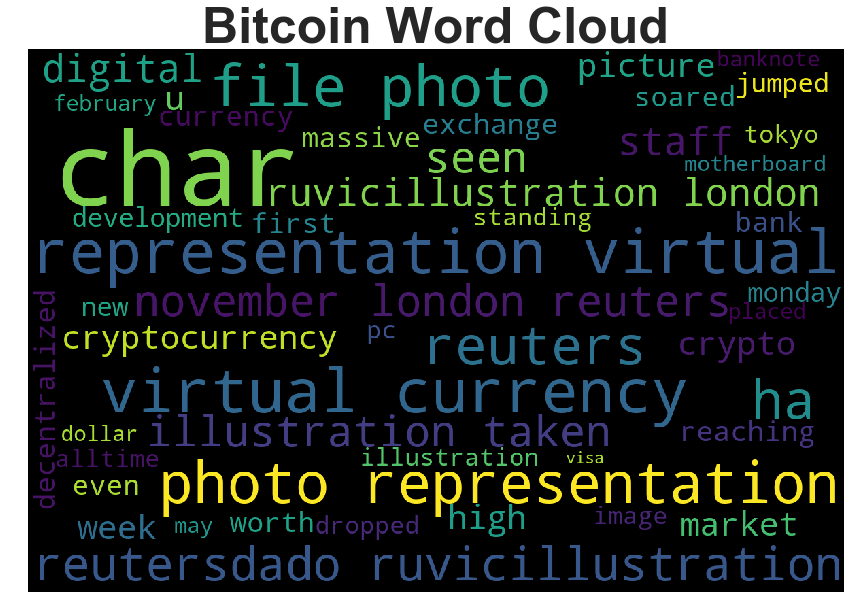

In [122]:
# Generate the Bitcoin word cloud
btc_wordcloud = ' '.join(top10_btc)
wc = WordCloud(width=1200, height=800, max_words=50).generate(btc_wordcloud)
plt.title("Bitcoin Word Cloud", fontsize=50, fontweight="bold")
plt.axis("off")
plt.imshow(wc);

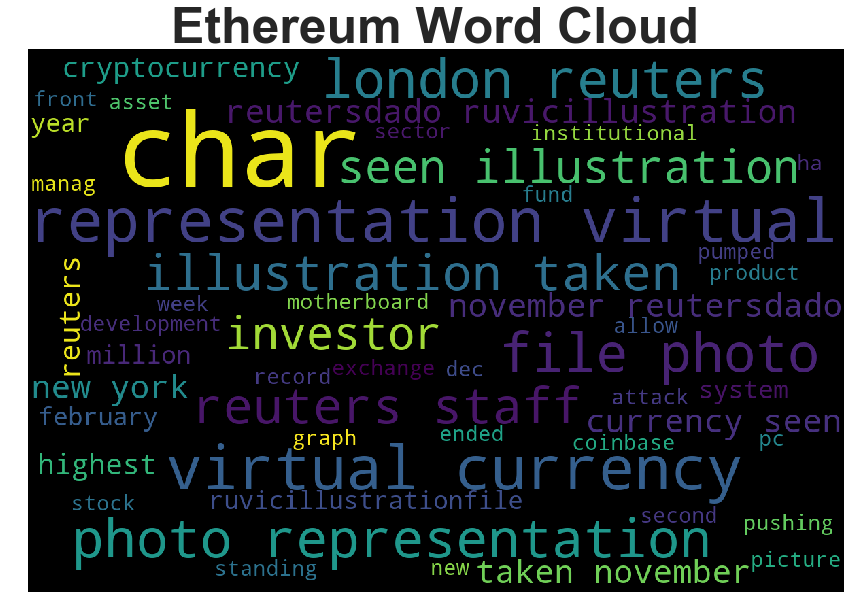

In [123]:
# Generate the Ethereum word cloud
eth_wordcloud = ' '.join(top10_eth)
wc = WordCloud(width=1200, height=800, max_words=50).generate(eth_wordcloud)
plt.title("Ethereum Word Cloud", fontsize=50, fontweight="bold")
plt.axis("off")
plt.imshow(wc);

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [124]:
import spacy
from spacy import displacy

In [125]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [126]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [127]:
# Concatenate all of the bitcoin text together
btc_corpus = ' '.join(bitcoin_df["text"].values)
btc_corpus

"Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars] In November 2017, after an absolutely massive, two-month rally, Bitcoin passed $10,000 for the first time. And then, over the next 20 days, it soared even higher, reaching a price of $19,665 and roug… [+6738 chars] Unlike ‘conventional’ cryptocurrencies, a central bank controls digital yuan — in this case, the People’s Bank of China. The move gives the country more power and, in theory, more stability than freq… [+366 chars] If youve been watching the crypto markets over the past few weeks youll have noticed something special: bitcoin, everyones favorite decentralized digital currency based on hype, lies, and general mal… [+2490 chars] Six years after the launch of the Mexico-based crypotcurrency exchange and financial services platform Bitso the company revealed it has 

In [129]:
# Run the NER processor on all of the text
ner_processor = nlp(btc_corpus)

# Add a title to the document
ner_processor.user_data["title"] = "All Articles on Bitcoin"

In [130]:
# Render the visualization
displacy.render(ner_processor, style='ent')

In [137]:
# List all Entities
btc_entities = [ent.text for ent in ner_processor.ents]
btc_entities_set = set(btc_entities)
btc_entities

['Visa',
 'first',
 'Bitcoin',
 'November 2017',
 'two-month',
 'Bitcoin',
 '10,000',
 'first',
 'the next 20 days',
 '19,665',
 'digital yuan',
 'the People’s Bank of China',
 'the past few weeks',
 'bitcoin',
 'digital',
 'hype',
 'Six years',
 'Mexico',
 '$62 million',
 'Decentralized',
 '4',
 'U.S.',
 'November',
 'today',
 '500',
 '10.8 percent',
 'November',
 'monthly',
 'April',
 'fourth',
 'Maisie Williams',
 'Arya Stark',
 'Lady Catelyn',
 'Eddard',
 'acolyte',
 'the Faceless Men',
 'Monday',
 '8',
 '7',
 'Bitcoin',
 'above $18,000',
 'Tuesday',
 'evening',
 'December 2017',
 'this week',
 'more than $18,000',
 'Bitcoin',
 'March 13, 2020',
 'REUTERS/',
 'Tom Wilson',
 'Justin HarperBusiness',
 'BBC News',
 'Bitcoin',
 'above $17,000',
 '12,800',
 'three-year',
 'Bitcoin',
 'this week',
 'Reuters',
 'Bitcoin',
 'November 19, 2020',
 'REUTERS/Dado Ruvic/Illustration',
 'Reuters',
 'Bitcoin',
 'February 3, 2018',
 'REUTERS/',
 'Reuters',
 'LONDON',
 'Reuters',
 'XRP',
 'Monday',

---

## Ethereum NER

In [133]:
# Concatenate all of the bitcoin text together
eth_corpus = ' '.join(eth_df["text"].values)
eth_corpus

"FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars] FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars] LONDON (Reuters) - Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.\r\nFILE PHOTO: Representation of the Ethereum virtual currency… [+1950 chars] NEW YORK (Reuters) - Institutional investors pumped $429 million into cryptocurrency funds and products for the week ended Dec. 7, the second highest on record, pushing the sectors assets under manag… [+1888 chars] NEW YORK (Reuters) - Institutional investors pumped $429 million into cryptocurrency funds and products for the week ended Dec. 7, th

In [134]:
# Run the NER processor on all of the text
ner_processor_eth = nlp(eth_corpus)

# Add a title to the document
ner_processor_eth.user_data["title"] = "All Articles on Ethereum"

In [135]:
# Render the visualization
displacy.render(ner_processor_eth, style='ent')

In [136]:
# List all Entities
eth_entities = [ent.text for ent in ner_processor_eth.ents]
eth_entities_set = set(eth_entities)
eth_entities_set

{'$24 million',
 '$429 million',
 '0.00011',
 '17,000',
 '20,000',
 'Bitcoin',
 'California',
 'Coinbase',
 'ETH',
 'February 3, 2018',
 'Hala Systems',
 'Hedera',
 'LONDON',
 'May 26, 2020',
 'Monday',
 'NEW YORK',
 'November 19, 2020',
 'October',
 'October 28, 2013',
 'PayPal',
 'REUTERS/',
 'REUTERS/Stephen Lam',
 'Reuters',
 'Sunnyvale',
 'Syrians',
 'The New York Times',
 'Tuesday',
 'U.S.',
 'XRP',
 'about 5¢',
 'early February this year',
 'last month',
 'second',
 'the Generosity Network',
 'the Plug and Play Tech Center',
 'the week ended Dec. 7',
 'this year'}

In [139]:
print("Conclusion")
print("====================")
print("Ethereum has the highest mean positive score of 0.060950.")
print("Ethereum also had the highest compound score of 0.877900.")
print("Ethereum had the highest positive score of 0.318 compared to Bitcoin at 0.174.")

Conclusion
Ethereum has the highest mean positive score of 0.060950.
Ethereum also had the highest compound score of 0.877900.
Ethereum had the highest positive score of 0.318 compared to Bitcoin at 0.174.
